#### Importing Libraries
The following script imports required libraries:

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the Dataset
Since our file is in CSV format, we will use panda's read_csv method to read our CSV data file. Execute the following script to do so:

In [43]:
data = pd.read_csv("bill_authentication.csv")

#### Data Analysis

In [44]:
data.shape

(1372, 5)

In [45]:
data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [46]:
data.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


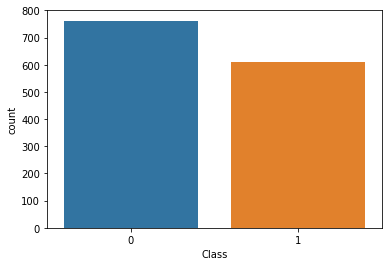

In [47]:
sns.countplot(data.Class)

#### Preparing the Data

In this section we will divide our data into attributes and labels and will then divide the resultant data into both training and test sets.

In [49]:
X = data.drop('Class', axis = 1)
y = data['Class']

'''
# OR
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# OR
X = data.values[:,:-1]
y = data.values[:,-1]

'''

'\n# OR\nX = data.iloc[:,:-1].values\ny = data.iloc[:,-1].values\n\n# OR\nX = data.values[:,:-1]\ny = data.values[:,-1]\n\n'

#### The final preprocessing step is to divide our data into training and test sets

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

#### Training and Making Predictions

In [51]:
from sklearn.tree import DecisionTreeClassifier  
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
y_pred = dtc.predict(X_test)

#### Evaluating the Algorithm

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9927272727272727

In [54]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[155   2]
 [  0 118]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

   micro avg       0.99      0.99      0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



## 2. Decision Tree for Regression

#### Importing Libraries

In [55]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

#### Importing the Dataset

In [56]:
data = pd.read_csv('petrol_consumption.csv')

#### Data Analysis

In [57]:
data.shape

(48, 5)

In [58]:
data.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


#### Preparing the Data

In [59]:
X = data.drop('Petrol_Consumption', axis = 1)
y = data['Petrol_Consumption']


''''
# OR
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# OR
X = data.values[:,:-1]
y = data.values[:,-1]

'''

"'\n# OR\nX = data.iloc[:,:-1].values\ny = data.iloc[:,-1].values\n\n# OR\nX = data.values[:,:-1]\ny = data.values[:,-1]\n\n"

#### Training and Making Predictions

In [64]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### To make predictions on the test set, ues the predict method:

In [67]:
from sklearn.tree import DecisionTreeRegressor  
dtr = DecisionTreeRegressor()  
dtr.fit(X_train, y_train)  

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [68]:
y_pred = dtr.predict(X_test)

In [71]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
df.head()

,Actual,Predicted
29,534,547.0
4,410,414.0
26,577,574.0
30,571,554.0
32,577,574.0


#### Evaluating the Algorithm

In [73]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.2
Mean Squared Error: 6298.2
Root Mean Squared Error: 79.36119958770784


The mean absolute error for our algorithm is 56.2, which is less than 10 percent of the mean of all the values in the 'Petrol_Consumption' column. This means that our algorithm did a fine prediction job.